# Relatório de Análise VII

### Identificando e Removendo Outliers

In [76]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [77]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep = ';')

In [78]:
dados.set_index('Unnamed: 0', inplace = True)

In [79]:
dados[dados['Valor'] >= 500000] # Selecionar valores acime de 500,000

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor M2,Tipo Agregado
Unnamed: 0,,,,,,,,,,,


In [80]:
valor = dados['Valor']

<AxesSubplot:>

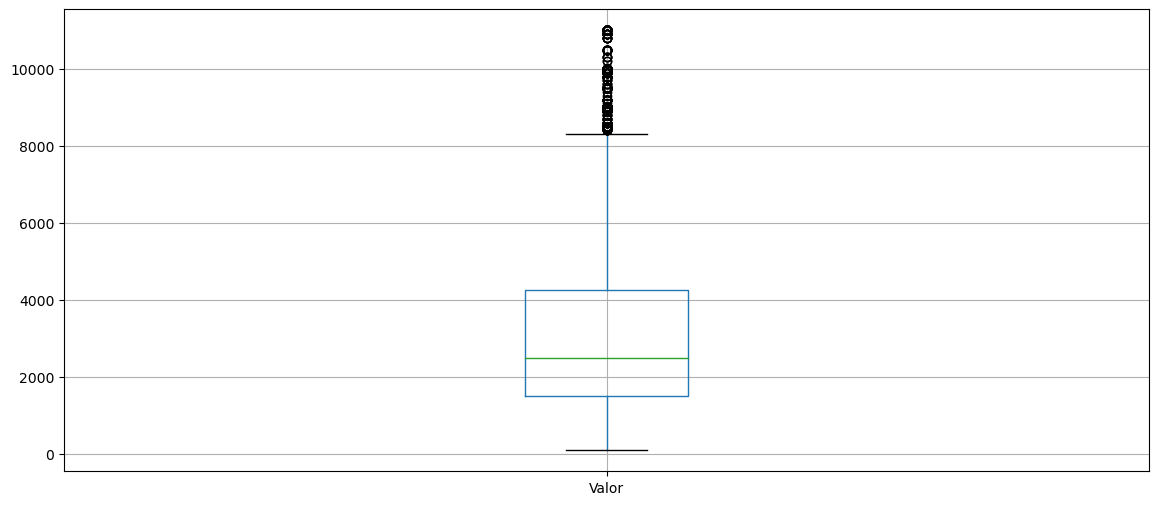

In [81]:
dados.boxplot(['Valor'])

In [82]:
valor

Unnamed: 0
0        1700.0
1        7000.0
2         800.0
3         800.0
5        1300.0
          ...  
22575     900.0
22576     800.0
22577    1800.0
22578    1400.0
22579    3000.0
Name: Valor, Length: 19814, dtype: float64

In [83]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [84]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

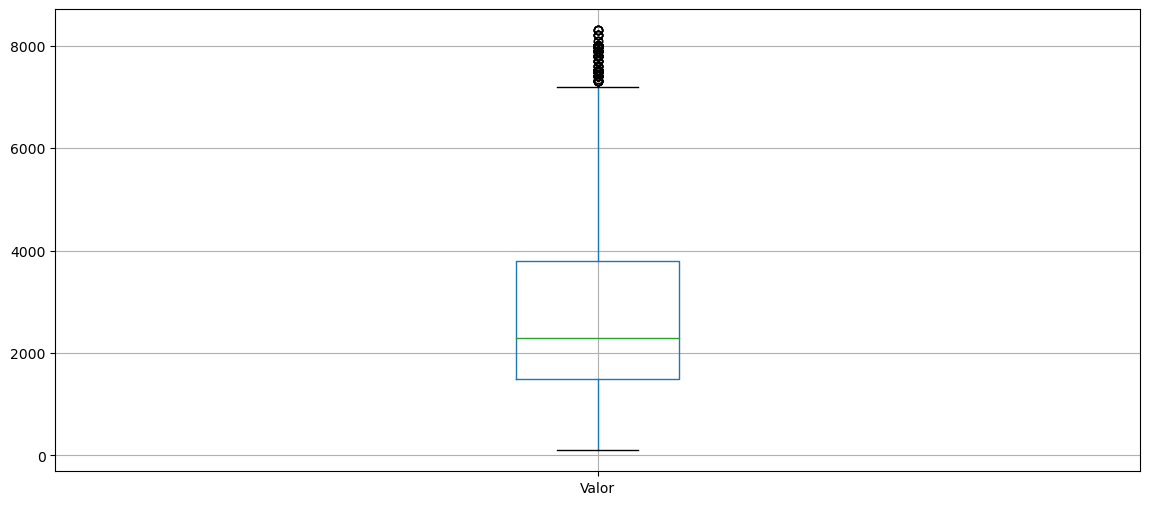

In [85]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

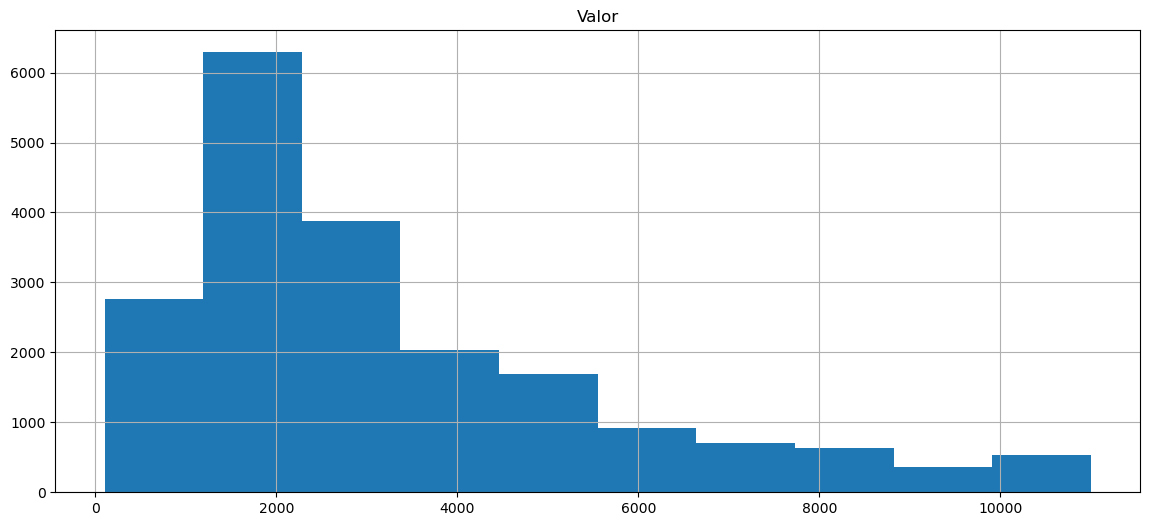

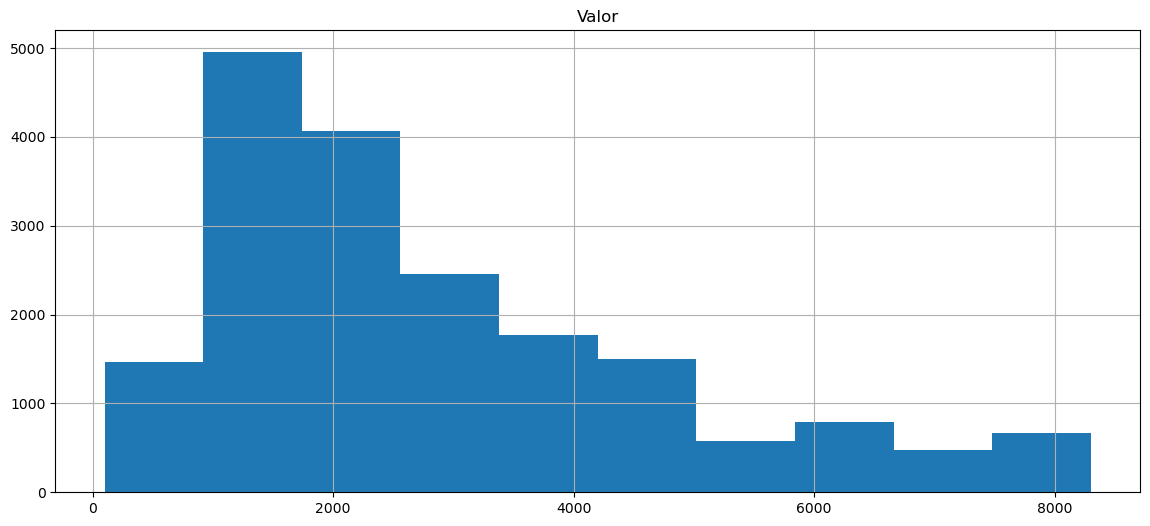

In [86]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Identificando e Removendo os Outliers

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

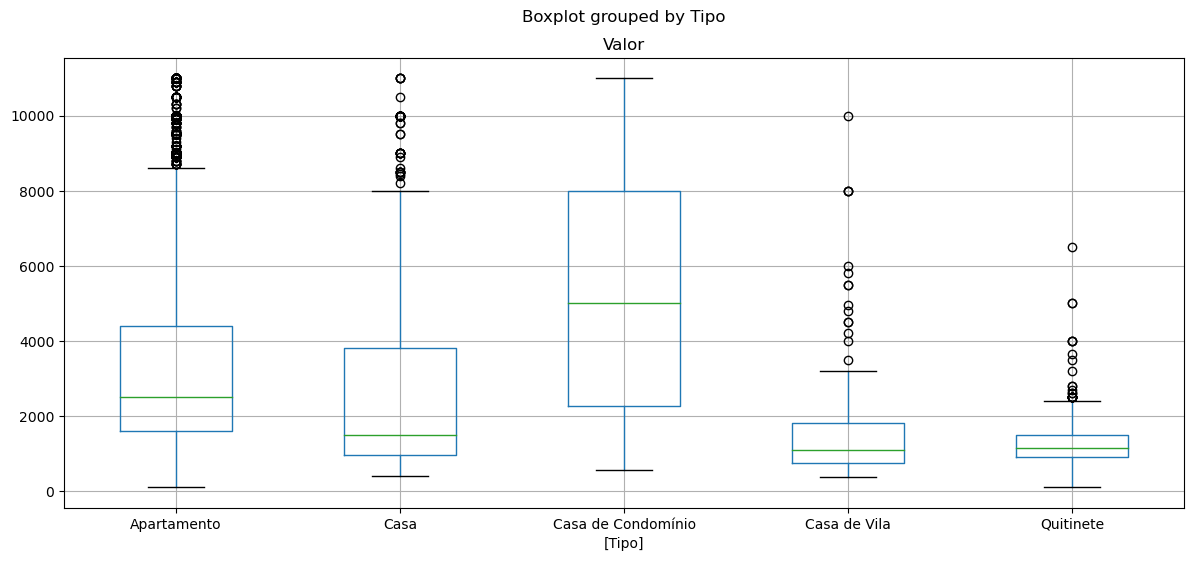

In [87]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [88]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [89]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [90]:
grupo_tipo.groups

{'Apartamento': [2, 3, 5, 9, 10, 11, 15, 16, 17, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 59, 62, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 86, 87, 88, 89, 91, 92, 94, 95, 97, 98, 99, 101, 102, 103, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 121, 122, 123, 124, 127, 128, 129, 131, 132, 135, ...], 'Casa': [1, 56, 100, 104, 150, 166, 188, 248, 260, 263, 274, 297, 321, 389, 396, 410, 436, 446, 486, 487, 493, 558, 559, 583, 588, 636, 648, 654, 655, 680, 721, 745, 802, 880, 897, 1059, 1066, 1154, 1156, 1189, 1211, 1284, 1291, 1373, 1388, 1409, 1451, 1465, 1480, 1485, 1513, 1516, 1530, 1630, 1649, 1705, 1711, 1721, 1734, 1760, 1768, 1815, 1865, 1890, 1930, 1961, 1989, 1998, 2017, 2082, 2102, 2139, 2171, 2199, 2238, 2280, 2321, 2354, 2373, 2451, 2459, 2508, 2510, 2540, 2544, 2597, 2642, 2722, 2747, 2830, 2837, 2847, 3004, 3008, 3015, 3041, 3055, 31

In [94]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [95]:
Q1

Tipo
Apartamento           1600.0
Casa                   960.0
Casa de Condomínio    2275.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [96]:
Q3

Tipo
Apartamento           4400.0
Casa                  3800.0
Casa de Condomínio    8000.0
Casa de Vila          1800.0
Quitinete             1500.0
Name: Valor, dtype: float64

In [97]:
IIQ

Tipo
Apartamento           2800.0
Casa                  2840.0
Casa de Condomínio    5725.0
Casa de Vila          1050.0
Quitinete              600.0
Name: Valor, dtype: float64

In [98]:
limite_inferior

Tipo
Apartamento          -2600.0
Casa                 -3300.0
Casa de Condomínio   -6312.5
Casa de Vila          -825.0
Quitinete                0.0
Name: Valor, dtype: float64

In [99]:
limite_superior

Tipo
Apartamento            8600.0
Casa                   8060.0
Casa de Condomínio    16587.5
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [101]:
limite_superior['Casa']

8060.0

<img src="box-plot.png" width=70%>

In [106]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

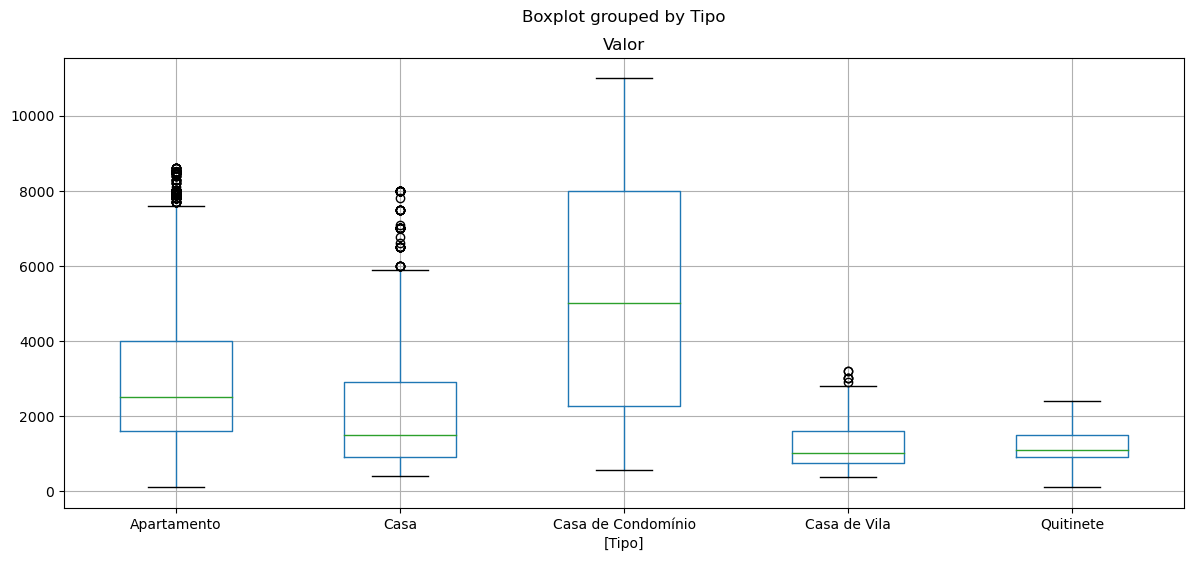

In [107]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [108]:
dados_new.to_csv('data/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)